# Exploring parameters

#### density plots, post predictive checks etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.9.1+cu102


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [16]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os

print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster/')



#print(os.getcwd())

#os.chdir('/home/kathi/Documents/Master_thesis/results_cluster')

## loading simulations from previously saved computations
#file = 'ERP_sequential_3params/step3'
#file = 'ERP_save_sim_nsf_num_params3'
#file = 'eval_features'
#file = '10000_multi_round_num_params_25newparams'

file = '10000sims_17params_07_04_nsf_fake_ratio'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu
/home/ubuntu/results


In [17]:
x = calculate_summary_stats_temporal(x_without)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [11]:
x 

tensor([[ 9.2100e+02,  2.6610e+03,  5.6960e+03,  ...,  5.9282e+00,
          1.4625e+02,  1.0665e+02],
        [ 1.0160e+03,  2.7040e+03,  5.8870e+03,  ..., -1.5473e+01,
          9.7303e+01,  1.0130e+02],
        [ 8.9700e+02,  2.7010e+03,  5.3200e+03,  ...,  1.3309e+01,
          1.2040e+02,  5.8503e+01],
        ...,
        [ 9.8200e+02,  2.7200e+03,  6.4110e+03,  ..., -1.4265e+01,
          9.0190e+01,  1.3343e+02],
        [ 9.1400e+02,  2.7480e+03,  7.0130e+03,  ...,  4.7939e+00,
          3.9276e+01,  7.6276e+01],
        [ 9.6800e+02,  2.6880e+03,  6.7590e+03,  ...,  2.6185e+01,
          3.4564e+01,  7.2223e+01]])

In [12]:
#obs_real = inference.run_only_sim(
#    true_params, sim_wrapper, num_workers=8
#)  # first output gives summary statistics, second without

In [8]:
obs_real_stat = calculate_summary_stats_temporal(obs_real, complete=True)

single observation
x shape torch.Size([1, 8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])


In [14]:
obs_real_stat.shape

torch.Size([1, 21])

In [15]:
thetas.shape

torch.Size([19000, 17])

## Inference step:

In [ ]:
density_estimator = 'nsf'


inf = SNPE(prior=prior, density_estimator = 'nsf')

#inf = SNPE_C(prior, density_estimator="nsf")

inf = inf.append_simulations(thetas, x)

density_estimator = inf.train()

In [ ]:
posterior = inf.build_posterior(density_estimator)


#true_params = torch.tensor([[26.61, 63.53,  137.12]])

In [16]:
posterior = posterior.set_default_x(obs_real_stat)

## Simulation under 'true parameters'

In [90]:
#obs_real = inference.run_only_sim(true_params, simulation_wrapper = sim_wrapper)
#obs_real = torch.load('{}/obs_real.pt'.format(file))

In [16]:
obs_real_stat

tensor([[ 3.5990e+03,  2.5930e+03,  6.2200e+03,  4.4323e+01, -4.7598e+01,
          1.0248e+02,  3.8162e+01,  3.8548e+01,  9.9400e+01,  1.5030e+02,
          2.1157e+03,  9.4073e+00,  9.9451e-01, -1.1030e+01, -1.1256e+01,
         -1.3215e+01, -2.4450e+01, -4.0142e+01,  4.1551e+01,  7.1129e+01,
          9.0119e+01]])

In [12]:
posterior = posteriors_round[1]

In [9]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((10000,), x=obs_real_stat)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

### Short intermezzo about parameter that changes trough amplitude

In [56]:
changed_sample = samples[0]

deep_trough_sample = changed_sample.detach().clone()
deep_trough_sample[3] = 0.4


flat_trough_sample = changed_sample.detach().clone()
flat_trough_sample[3] = 0.0

In [57]:
print(deep_trough_sample[3])

tensor(0.4000)


In [59]:
### simulate from artifical samples:

deep_x = inference.run_only_sim([deep_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 29.1046333  29.1460581
 28.8649825 ]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


In [60]:
flat_x = inference.run_only_sim([flat_trough_sample], simulation_wrapper=sim_wrapper, num_workers=8)

early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [-0.65883599 -0.50397926 -0.63093067 ... 28.71822976 28.75989132
 28.47905658]
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  1.0min finished


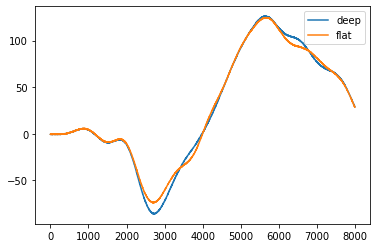

In [63]:
### plot simulations from artifical samples: L5 basket NMDA -> higher value should lead to deeper trough as reported by Jonson

plt.plot(deep_x[0], label='deep')
plt.plot(flat_x[0], label='flat')
plt.legend()

In [45]:
import functools
assert_equal = functools.partial(torch.testing.assert_close, rtol=0, atol=0)
assert_equal(flat_x, deep_x)

In [12]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [10]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-2.2265e-02, -3.6002e-03,  7.2985e-01,  1.1950e-01,  4.0699e-02,
         2.3537e+01, -3.4819e-05, -4.8428e-02,  1.4294e-02,  1.9820e-01,
         9.4912e-02,  5.7368e+01, -2.3758e+00, -2.5560e+00,  1.3711e-01,
         2.4912e-01,  9.4494e+01])
tensor([8.0493e-02, 2.9225e-02, 3.0883e+00, 6.7841e-01, 8.7123e-02, 3.0142e+01,
        6.3631e-05, 8.2956e-02, 3.5359e-02, 7.2827e-01, 4.0079e-01, 6.0881e+01,
        1.0971e+01, 7.6401e+00, 1.3936e+00, 1.7204e+00, 1.3475e+02])
tensor([3.0827e-02, 9.8476e-03, 7.0755e-01, 1.6767e-01, 1.3927e-02, 1.9816e+00,
        2.9535e-05, 3.9415e-02, 6.3196e-03, 1.5902e-01, 9.1763e-02, 1.0538e+00,
        4.0041e+00, 3.0588e+00, 3.7693e-01, 4.4139e-01, 1.2076e+01])


In [14]:
limits = [list(tup ) for tup in zip(prior_min, prior_max)]

In [22]:
true_params

tensor([[2.7700e-01, 3.9900e-02, 6.2440e-01, 3.7390e-01, 0.0000e+00, 1.8977e+01,
         1.2000e-05, 1.1500e-02, 1.3400e-02, 7.6700e-02, 6.3370e-02, 6.3080e+01,
         4.6729e+00, 2.3300e+00, 1.6733e-02, 6.7900e-02, 1.2086e+02]])

<Figure size 432x288 with 0 Axes>

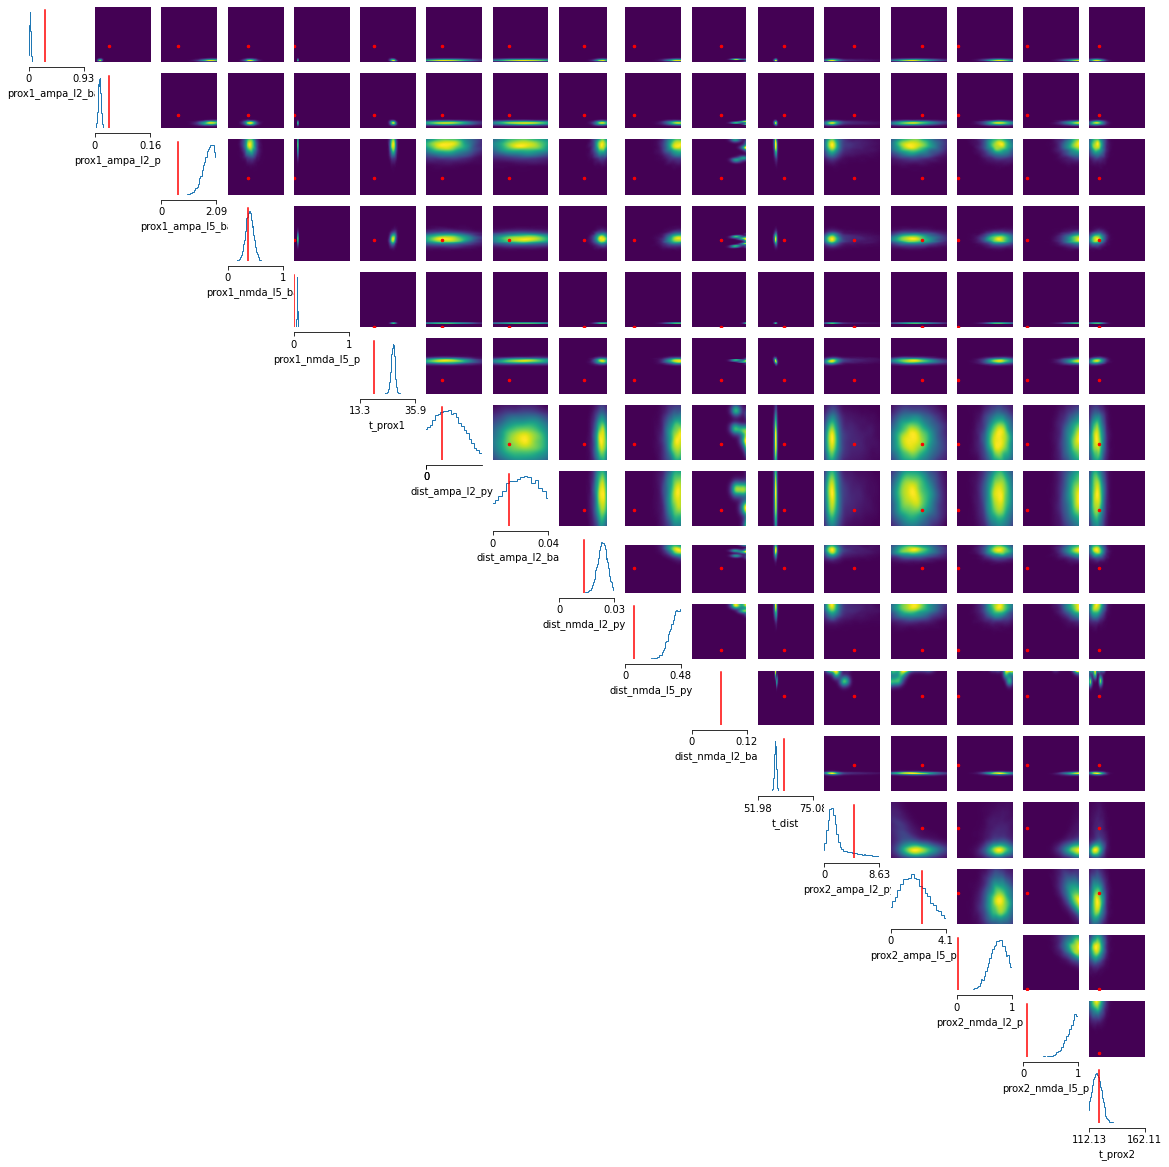

In [15]:
#limits = [list(tup) for tup in zip(prior_min, prior_max)]


plt.set_cmap('viridis')

fig, axes = analysis.pairplot(
    samples,
    limits=limits,
    upper = 'kde',
    lower='kde',
    #subset=[5, 11, 16],
    ticks=np.round(limits,2),
    figsize=(20, 20),
    points=true_params,
    points_offdiag={"markersize": 5},
    points_colors="r",
    labels=parameter_names,
)



#for i in range(5):
#    axes[i][i].xaxis.label.set_color('magenta')
#for i in range(5, 12):
#    axes[i][i].xaxis.label.set_color('navy')
#for i in range(12, 17):
#    axes[i][i].xaxis.label.set_color('deeppink')

In [31]:
posterior.set_default_x(obs_real_stat)

In [140]:
import pandas as pd
trace = pd.read_csv('data/ERPYes3Trials/dpl.txt', sep='\t', header=None, dtype= np.float32)

print(trace)
obs_real = torch.tensor(trace.values, dtype = torch.float32)

trace2 = pd.read_csv('data/default/dpl.txt', sep='\t', header=None, dtype= np.float32)

print(trace)
obs_real2 = torch.tensor(trace2.values, dtype = torch.float32)


               0          1         2          3
0       0.000000  -0.597602 -0.000357  -0.597244
1       0.025000  -0.598407 -0.000356  -0.598051
2       0.050000  -0.599206 -0.000355  -0.598852
3       0.075000  -0.600000 -0.000354  -0.599647
4       0.100000  -0.600788 -0.000352  -0.600436
...          ...        ...       ...        ...
6796  169.899994  24.551149  8.279498  16.271650
6797  169.925003  24.471813  8.248908  16.222906
6798  169.949997  24.392578  8.218372  16.174206
6799  169.975006  24.313431  8.187889  16.125544
6800  170.000000  24.234365  8.157454  16.076912

[6801 rows x 4 columns]
               0          1         2          3
0       0.000000  -0.597602 -0.000357  -0.597244
1       0.025000  -0.598407 -0.000356  -0.598051
2       0.050000  -0.599206 -0.000355  -0.598852
3       0.075000  -0.600000 -0.000354  -0.599647
4       0.100000  -0.600788 -0.000352  -0.600436
...          ...        ...       ...        ...
6796  169.899994  24.551149  8.279498  16.27

In [146]:
obs_real.shape

torch.Size([6801, 4])

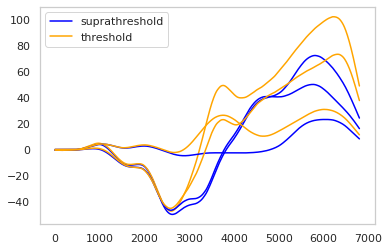

In [154]:
plt.plot(obs_real[:,1], c='blue', label='suprathreshold')
plt.plot(obs_real2[:,1], c='orange', label='threshold')

plt.plot(obs_real[:,2:], c='blue')
plt.plot(obs_real2[:,2:], c='orange')

plt.legend()

In [216]:
condition = posterior.sample((1,))
condition2 = posterior.sample((1,))


condition.shape

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([1, 17])

## Conditional density plot

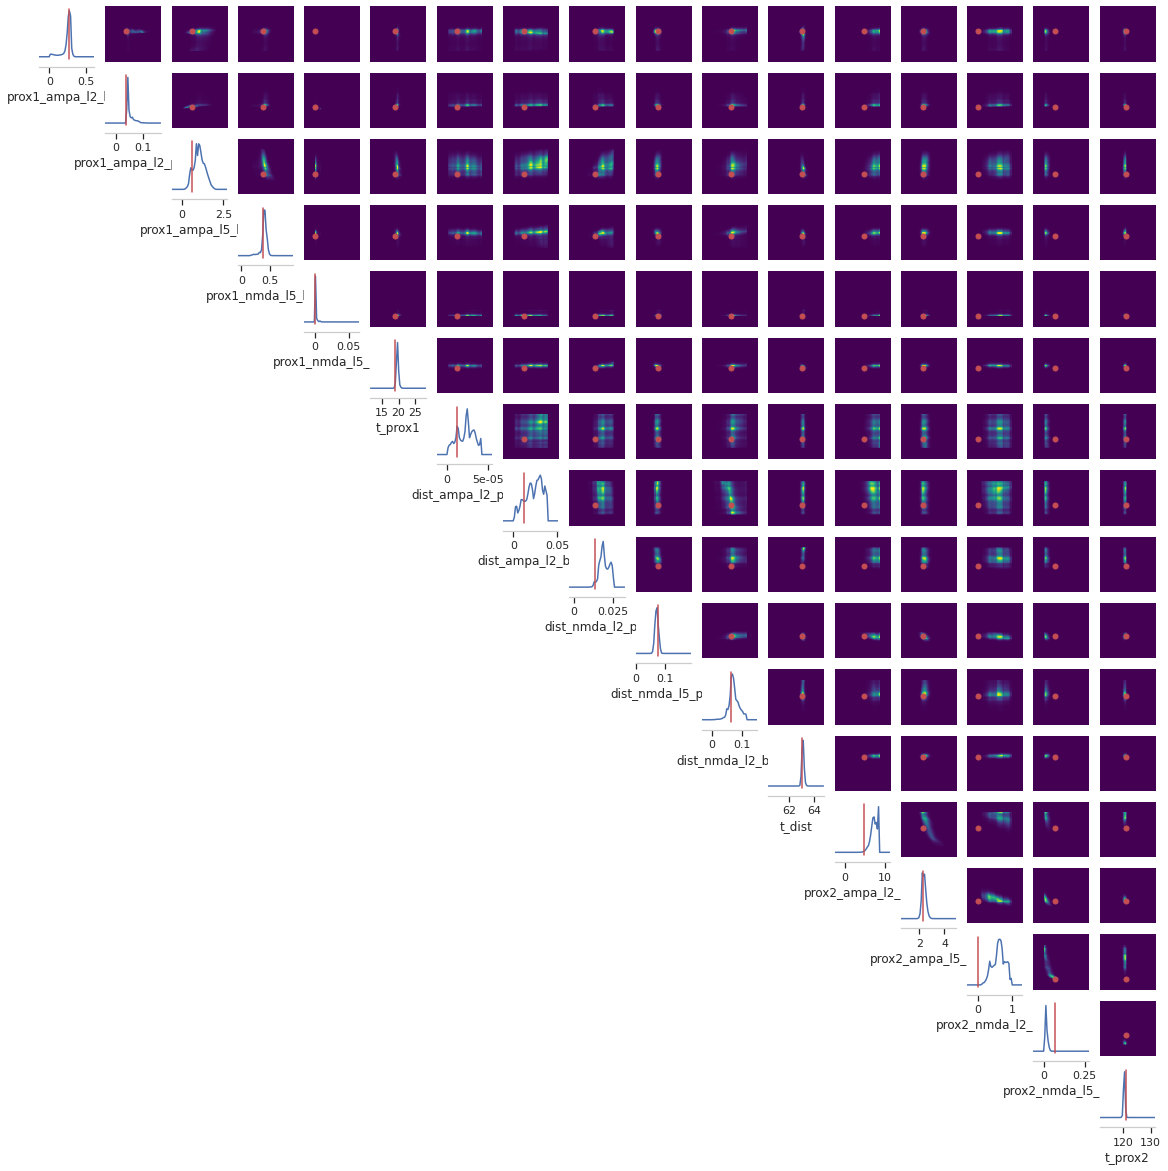

In [220]:
fig, ax = analysis.conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=limits,
    figsize=(20, 20),
    points=true_params,
    upper = 'kde',
    lower='kde',
    points_offdiag={"markersize": 10},
    points_colors="r",
    labels=parameter_names,
    #subset = [1, 3, 5]
    #color_map = ['Blues', 'Reds'],
    #alpha1 = 0.8,
    #alpha2 = 0.4

)




In [246]:
samples = posterior.sample((100,), x=obs_real_stat)

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 100 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


In [247]:
s_x = inference.run_only_sim(samples, simulation_wrapper=sim_wrapper, num_workers=8)

param sizeparam size param size  171717

param sizeearly stopearly stop 
17early stopparam size
 early stop 200.0
 param size 200.0param size  
 200.017
param size param size param size 200.017 

param size   1717param size

 
1717

early stop  early stop17 
200.0early stop 
200.0param size 
 param size  1717200.017


param size 
early stop  17200.0

param size  17joblib will run over 1 jobsjoblib will run over 1 jobs
joblib will run over 1 jobs


joblib will run over 1 jobs
joblib will run over 1 jobs[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.

joblib will run over 1 jobs
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soBuilding the NEURON model

Loading custom

Simulation time: 20.0 ms...
Simulation time: 0.03 ms...
Simulation time: 30.0 ms...
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 50.0 ms...
Simulation time: 30.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.

 13.04088868]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  33 tasks      | elapsed: 10.3min
Simulation time: 130.0 ms...
Building the NEURON model
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 150.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 150.0 ms...
Simulation time: 10.0 ms...
Simulation time: 110.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 190.0 ms...
obs [-0.5482779  -0.54821654 -0.54812506

Building the NEURON model
Simulation time: 10.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 50.0 ms...
Simulation time: 150.0 ms...
obs [-0.56868727 -0.56844601 -0.56816215 ... 17.39003395 17.33119492
 17.27240586]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  55 tasks      | elapsed: 15.6min
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 60.0 ms...
Simulation time: 160.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 20.0 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 70.0 ms...
Simulation time: 170.0 ms...
Sim

Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 10.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms...
Simulation time: 110.0 ms...
Simulation time: 170.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 20.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 150.0 ms...
Simulation time: 120.0 ms...
Simulation time: 180.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 30.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 130.0 ms...
Simulation time: 190.0 ms...
Simulation time: 130.0 ms...
Simulation time: 120.0 ms...
Simulation time: 40.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 170

Simulation time: 190.0 ms...
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 190.0 ms...
Simulation time: 190.0 ms...
Simulation time: 80.0 ms...
obsSimulation time: 40.0 ms... [-0.53810521 -0.53763667 -0.53712398 ... 12.68362366 12.64168389
 12.59975098]

param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
Building the NEURON model
Simulation time: 20.0 ms...
obs [-0.58634511 -0.58674534 -0.58714708 ... 11.23522266 11.19689849
 11.15861184]
[Parallel(n_jobs=8)]: Done  93 out of 100 | elapsed: 26.7min remaining:  2.0min
obs [-0.54482167 -0.54452581 -0.54418512 ... 15.12937593 15.08063849
 15.031862  ]
Simulation time: 50.0 ms...
obs [-0.57834684 -0.57847079 -0.578573   ... 14.5460757  14.49972296
 14.45338005]
Simulation time: 90.0 ms...
[Parallel(n_jobs=8)]: Done  95 out of 100 | elapsed: 26.7min remaining:  1.4min
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 60.0 ms...
[Done]
ru

In [248]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [249]:
samples_prior[:][0].shape

torch.Size([17])

In [250]:
    
s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)

param sizeparam size  17
17param sizeparam size 
early stop early stop17param size param size200.0param size  171717 
 param size 



early stopearly stopearly stop   200.0200.0 17

17early stop200.0200.0
early stop param size  200.0200.0

param size  param size 17
  17
param size

 param size  1717
early stop

 17param size 
 200.017param size 

param size  17
 17
joblib will run over 1 jobs
joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobsjoblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
joblib will run over 1 jobs
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.so
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soBuilding the NEURON model
Loading custom 

Building the NEURON model
Building the NEURON model
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 64.69756779 64.48459024
 64.27162987]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  2.3min
Building the NEURON model
obs [-0.59760178 -0.59840714 -0.59920666 ... 61.32231482 61.13924188
 60.95608653]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  2.4min
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 0.03 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...


Simulation time: 70.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 80.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 110.0 ms...
Simulation time: 110.0 ms...
Simulation time: 140.0 ms

Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 140.0 ms...
Simulation time: 160.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 170.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 150.0 ms...
Simulation time: 170.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 160.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ..

obs [-0.59760178 -0.59840714 -0.59920666 ... 30.28260395 30.18612873
 30.08969948]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  54 tasks      | elapsed: 16.5min
Simulation time: 10.0 ms...
Building the NEURON model
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ...  8.23473811  8.20824632
  8.18176342]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  55 tasks      | elapsed: 16.6min
obs [-0.59760178 -0.59840714 -0.59920666 ... 28.42655873 28.33231394
 28.23809733]
param size 17
early stop 200.0
param size  17
Building the NEURON model
joblib will run over 1 jobs
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 16.6min
Simulation time: 30.0 ms...
Building the NEURON model
Simulation time: 20.0 ms...
Simulation time: 20.0 ms...
Simulation time: 40.0 ms...
Simulation

Simulation time: 70.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 130.0 ms...
Simulation time: 70.0 ms...
Simulation time: 130.0 ms...
Simulation time: 90.0 ms...
Simulation time: 90.0 ms...
Simulation time: 80.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 140.0 ms...
Simulation time: 80.0 ms...
Simulation time: 140.0 ms...
Simulation time: 100.0 ms...
Simulation time: 100.0 ms...
Simulation time: 90.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 150.0 ms...
Simulation time: 90.0 ms...
Simulation time: 150.0 ms...
Simulation time: 110.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 160.0 ms...
Simulation time: 100.0 ms...
Simulation time: 160.0 ms...
Simulation time: 120.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 

[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 170.0 ms...
Simulation time: 190.0 ms...
Simulation time: 160.0 ms...
Simulation time: 170.0 ms...
Simulation time: 10.0 ms...
Simulation time: 180.0 ms...
Simulation time: 180.0 ms...
Simulation time: 10.0 ms...
obs [-0.59760178 -0.59840714 -0.59920666 ... 13.73271507 13.68804071
 13.64340713]
param size 17
early stop 200.0
param size  17
joblib will run over 1 jobs
Simulation time: 170.0 ms...
Building the NEURON model
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 20.0 ms...
Simulation time: 190.0 ms...
Simulation time: 20.0 ms...
Simulation time: 180.0 ms...
Simulation time: 190.0 ms...
obs [ 0.79991807  0.81983951  0.83989929 ... 27.26565408 27.17805902
 27.0904637 ]
[Parallel(n_jobs=8)]: Done  93 out of 100 | elapsed: 28.3min remaining:  2.1min
Simulation time: 10.0 ms...
Simulation time: 30.0 ms...
obs [ 0.051184

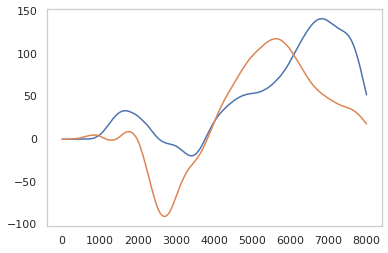

In [51]:
plt.plot(s_x_prior[0])
plt.plot(s_x[0])

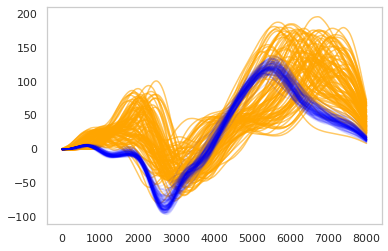

In [251]:
for i in range(100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
for i in range(100):

    plt.plot(s_x[i], color='blue', alpha=0.1)

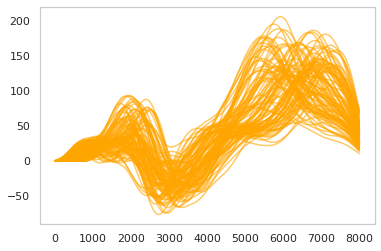

In [60]:
for i in range(0,100):
    plt.plot(s_x_prior[i], color='orange', alpha=0.6)
    
#for i in range(51,100):
#    plt.plot(s_x[i], color='blue', alpha=0.1)

In [252]:
s_x_torch = torch.stack(([s_x[i] for i in range(39)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(39)]))


mean = torch.mean(s_x_torch, 0)
std = torch.std(s_x_torch, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

lower = mean - 1.96 * std


upper = mean + 1.96 * std


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



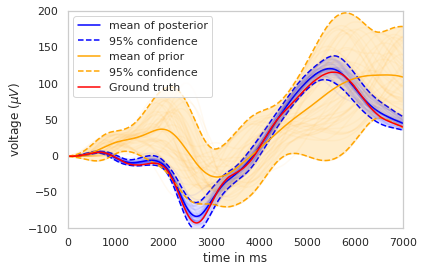

In [253]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1)
#ax.set_title("Comparing signal")

    
plt.plot(mean, color ='blue', label='mean of posterior')

for s in s_x[0:40]:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    plt.xlim(0, 7000)

plt.plot(lower, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower, y2=upper, color='blue', alpha=0.1)
plt.xlim(0, 7000)
plt.ylim(-100, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior[0:40]:
    plt.plot(x_w, alpha=0.05, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)
plt.xlim(0, 7000)

plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real[0], label='Ground truth', color='red')



plt.legend()

## Correlation matrices

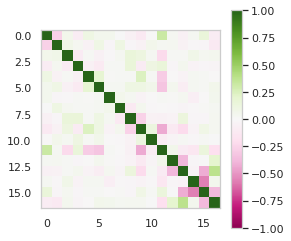

In [244]:
corr_matrix_marginal = np.corrcoef(samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 1 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


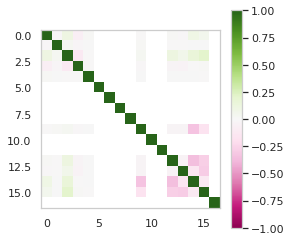

In [245]:
condition = posterior.sample((1,))

cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*17),
)

fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

## Looking at correlations of parameters

In [ ]:
## parameter 3 and 4 should be highly correlated:

## Evaluation of features

In [8]:
import matplotlib.cm as cm
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable
from torch import Tensor
from typing import Tuple, List, Optional, Dict
from matplotlib.pyplot import Axes
from matplotlib.figure import Figure
from matplotlib.colors import LogNorm


In [83]:
t = obs_real_stat

t

tensor([[ 6.9800e+02,  2.6790e+03,  5.5510e+03,  5.0662e+00, -9.2767e+01,
          1.1571e+02,  3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,
          4.9754e+03,  6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01,
         -1.5394e+01, -3.4815e+01, -6.5808e+01,  3.7142e+01]],
       dtype=torch.float64)

In [84]:
# t.shape

t1 = torch.cat((t[:,:1], t[:,1+1:]), axis = 1)
print(t1)
t1.shape

tensor([[ 6.9800e+02,  5.5510e+03,  5.0662e+00, -9.2767e+01,  1.1571e+02,
          3.0405e+00,  2.9002e+01,  1.1269e+02,  3.5632e+00,  4.9754e+03,
          6.3653e+00,  1.9096e+00, -1.1660e+01, -1.0371e+01, -1.5394e+01,
         -3.4815e+01, -6.5808e+01,  3.7142e+01]], dtype=torch.float64)


torch.Size([1, 18])

In [85]:
posterior.set_default_x(obs_real_stat)

In [86]:
thetas = posterior.sample((10000,))
thetas.shape

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

torch.Size([10000, 17])

In [89]:

for i in range(19):
    x = calculate_summary_stats_temporal(x_without)
    #leaving one summary statistic out
    x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
    print(x_c.shape)
    print('t shape', t.shape)
    print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
    inf = SNPE(prior=prior, density_estimator = 'nsf')
    inf = inf.append_simulations(thetas, x_c)
    density_estimator = inf.train()
    posterior1 = inf.build_posterior(density_estimator)
    globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))


batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [13]:
sum_stats_names =                                [
                    'arg_p50',
                    'arg_N100',
                    'arg_P200',
                    'p50',
                    'N100',
                    'P200',
                    'p50_moment1',
                    'N100_moment1',
                    'P200_moment1',
                    'p50_moment2',
                    'N100_moment2',
                    'P200_moment2',
                    'mean1000',
                    'mean1500',
                    'mean1700',
                    'mean1900',
                    'mean2100',
                    'mean2300',
                    'mean4000',
                ]

sample_list = []
for i in range(len(sum_stats_names)):
    sample_list.append(globals()['samples_%s' % i] )

    
plt.figure(figsize = (25,20))
im = plot_varchanges(sample_list, samples, xticklabels=sum_stats_names, yticklabels= parameter_names, plot_label='', batchsize=0)
plt.show(im)

KeyError: 'samples_0'

In [90]:
sample_batch = []
batch_size = 5

for i in range(batch_size):

    sample_list = []
    
    for i in range(19):
        

        x = calculate_summary_stats_temporal(x_without)
        #leaving one summary statistic out
        x_c = torch.cat((x[:,:i], x[:,i+1:]), axis = 1)
        print(x_c.shape)
        print('t shape', t.shape)
        print(torch.cat((t[:i], t[i+1:]), axis = 0).shape)
        inf = SNPE(prior=prior, density_estimator = 'nsf')
        inf = inf.append_simulations(thetas, x_c)
        density_estimator = inf.train()
        posterior1 = inf.build_posterior(density_estimator)
        globals()['samples_%s' % i] = posterior1.sample((num_samples,), x=torch.cat((t[:,:i], t[:,i+1:]), axis = 1))
        
        sample_list.append(globals()['samples_%s' % i] )
        
    sample_batch.append(sample_list)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

torch.Size([19000, 18])
t shape torch.Size([1, 19])
torch.Size([0, 19])


AssertionError: Number of parameter sets (=10000 must match the number of simulation outputs (=19000)

In [119]:
sample_batch

[]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'voltage ($\\mu V$)')

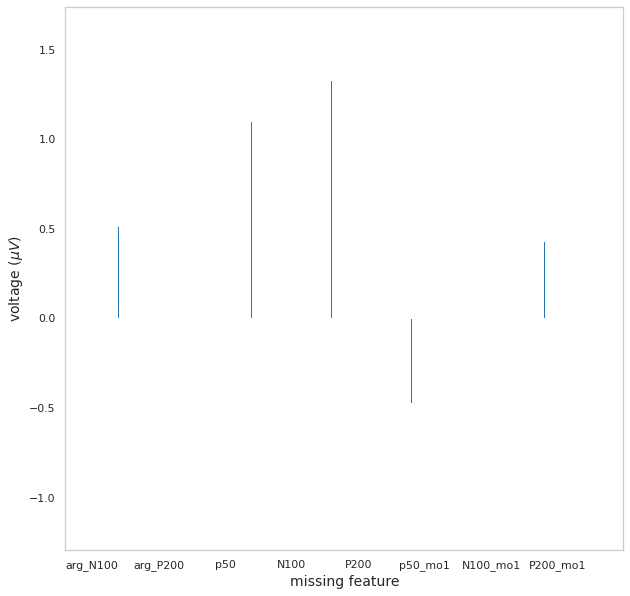

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)


plot_KLs(sample_list,
        samples,
        idx=0,
        batchsize=0,
         kind='bar',
        agg_with='mean'
    )


axes.set_xlabel("missing feature", size=14)
axes.set_xticklabels(sum_stats_names)
ax.tick_params(axis="both", which="major", labelsize=12)
ylabel = ax.get_ylabel()
axes.set_ylabel(ylabel, size=14)


## Histograms

In [65]:
s_x_prior_stat = calculate_summary_stats_temporal(s_x_prior_torch)

s_x_stat = calculate_summary_stats_temporal(s_x_torch)

batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch shape torch.Size([8001])
batch sh

In [52]:
s_x_prior_stat.shape

torch.Size([100, 19])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


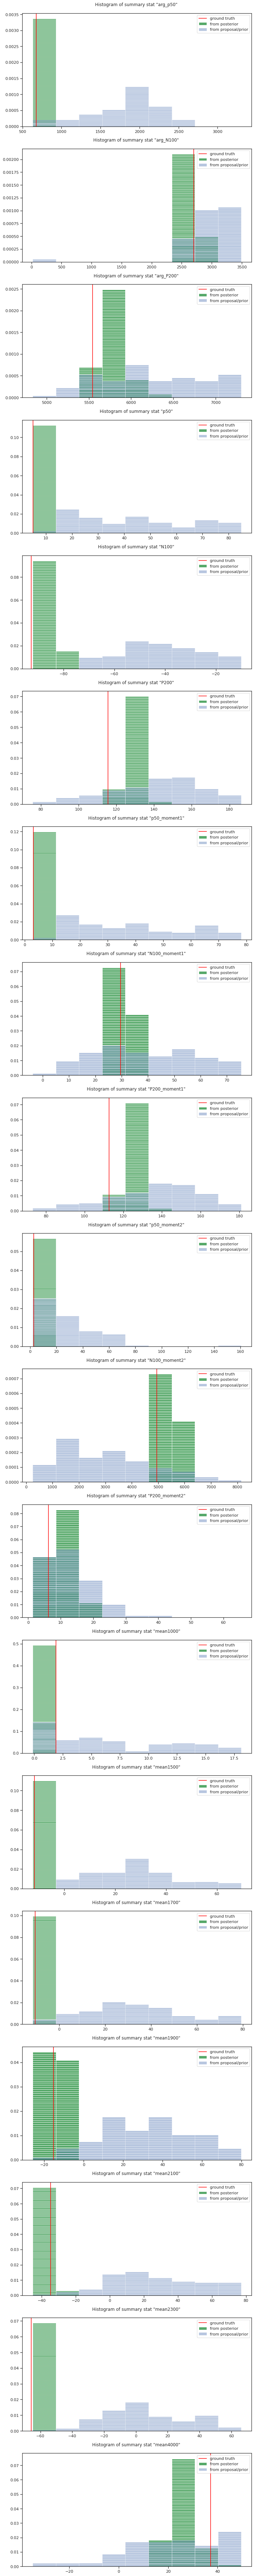

In [93]:
import matplotlib.gridspec as gridspec


import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")
sns.set_style("ticks")



fig = plt.figure(figsize=(10,100), tight_layout=True)

gs = gridspec.GridSpec(nrows=len(sum_stats_names), ncols=1)



#fig.suptitle('Summary stats histogram from posterior predictions.', y=0.2, fontsize=16)


for i in range(19):
    
    print(i)

    globals()['ax%s' % i] = fig.add_subplot(gs[i])

    globals()['sum_stats%s' % i] = []
    globals()['x%s' % i] = []

    for j in range(s_x_prior_stat.shape[0]):
        globals()['sum_stats%s' % i].append(s_x_stat[j][i])
        globals()['x%s' % i].append(s_x_prior_stat[j][i])

    sum_stat = globals()['sum_stats%s' % i]
    x_s = globals()['x%s' % i]

    ##define bins such that we get an equal number of bins at the end
    
    binsteps = np.abs(max([max(x_s), max(sum_stat)])-min([min(x_s), min(sum_stat)]))*0.1 
    
   
    binrange = np.arange(min([min(x_s), min(sum_stat)]), max([max(x_s), max(sum_stat)]), binsteps)
  

   
    
    globals()['ax%s' % i].hist(globals()['sum_stats%s' % i],  density=True, bins=binrange, facecolor='g', alpha=0.99, histtype='barstacked', label='from posterior')
    globals()['ax%s' % i].hist(globals()['x%s' % i],  density=True, bins=binrange, facecolor='b', alpha=0.4, histtype='barstacked', label='from proposal/prior')
    
  
    globals()['ax%s' % i].set_title('Histogram of summary stat "{}" '.format(sum_stats_names[i]), pad=20)
    #ax0.set(ylim=(-500, 7000))

    globals()['ax%s' % i].axvline(obs_real_stat[0][i].detach().numpy(), color='red', label='ground truth')
    globals()['ax%s' % i].legend(loc='upper right')

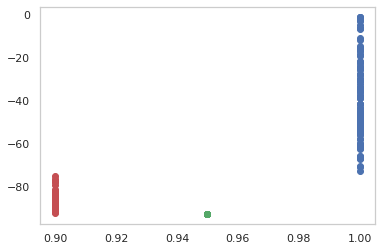

In [89]:
for i in range(100):

    plt.scatter(1,s_x_prior_stat[i][4], color='b')
    plt.scatter(0.9,s_x_stat[i][4], color='r')
    plt.scatter(0.95, obs_real_stat[0][4], color='g')

In [71]:
obs_real_stat[0][0]

tensor(677.)

In [8]:
from sbi.analysis.sbc import check_sbc, run_sbc, get_nltp
from sbi.analysis.plot import sbc_rank_plot
from sbi.inference import SNPE, SNPE_C, prepare_for_sbi, simulate_for_sbi
from sbi.simulators import linear_gaussian, diagonal_linear_gaussian

In [66]:
thetas = torch.stack(([samples_prior[i] for i in range(len(samples_prior))]))
xs = s_x_prior_stat

In [73]:
posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[4.9720e-02, 1.9231e+01, 1.6711e-02, 6.1002e+01, 7.4212e-02, 1.1468e+02],
        [3.2012e-02, 1.9392e+01, 1.7936e-02, 6.2570e+01, 3.4590e-02, 1.1599e+02],
        [5.3737e-02, 1.9460e+01, 2.8572e-03, 6.1723e+01, 2.1022e-01, 1.1322e+02],
        ...,
        [6.5962e-02, 2.0285e+01, 7.5865e-03, 6.1476e+01, 5.8498e-02, 1.1233e+02],
        [5.3234e-02, 1.9263e+01, 8.2176e-03, 6.1631e+01, 2.7745e-02, 1.1345e+02],
        [6.3074e-02, 1.8466e+01, 1.3858e-02, 6.1144e+01, 6.8865e-02, 1.1506e+02]])

In [89]:
# run SBC: for each inference we draw 1000 posterior samples.
num_posterior_samples = 1000
ranks, dap_samples = run_sbc(thetas, xs, posterior, num_posterior_samples=num_posterior_samples)

check_stats = check_sbc(ranks, thetas, dap_samples, num_posterior_samples=num_posterior_samples)


print(f"kolmogorov-smirnov p-values \ncheck_stats['ks_pvals'] = {check_stats['ks_pvals'].numpy()}")


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/sbc.py:50: UserWarning: Number of SBC samples should be on the order of 100s to give realiable
            results. We recommend using 300.
  results. We recommend using 300."""


Running 100 sbc samples.:   0%|          | 0/100 [00:00<?, ?it/s]

assertion error


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn

kolmogorov-smirnov p-values 
check_stats['ks_pvals'] = [5.4196433e-26 6.1653069e-40 0.0000000e+00 1.2131434e-23 0.0000000e+00
 5.5036876e-17]


In [87]:
print(f"c2st accuracies \ncheck_stats['c2st_ranks'] = {check_stats['c2st_ranks'].numpy()}")
print(f"- c2st accuracies check_stats['c2st_dap'] = {check_stats['c2st_dap'].numpy()}")


c2st accuracies 
check_stats['c2st_ranks'] = [0.8   0.905 0.95  0.91  0.875 0.79 ]
- c2st accuracies check_stats['c2st_dap'] = [0.82  0.935 0.96  0.895 0.72  0.625]


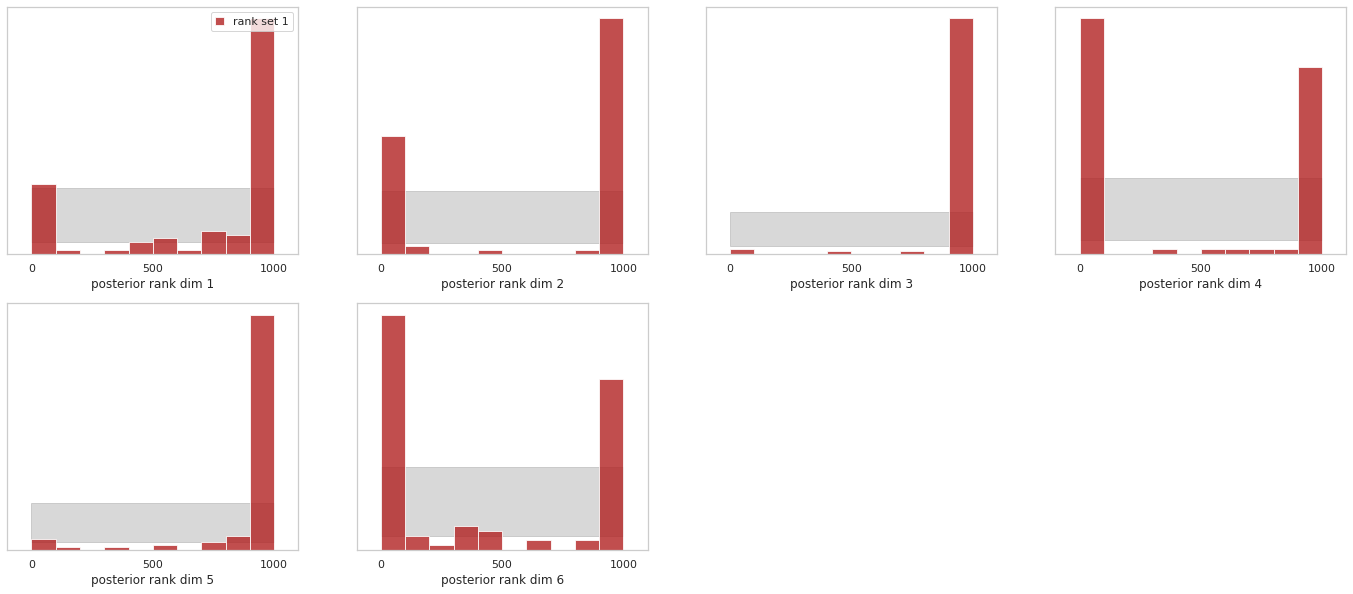

In [88]:
from sbi.analysis.plot import sbc_rank_plot

f, ax = sbc_rank_plot(ranks=ranks,
                      num_posterior_samples=num_posterior_samples,
                      plot_type="hist",
                      num_bins=10 # by passing None we use a heuristic for the number of bins.
                      )

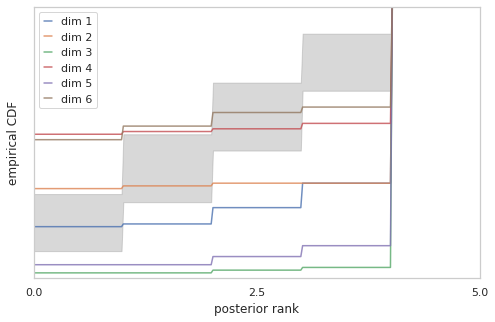

In [85]:
f, ax = sbc_rank_plot(ranks, 1_000, plot_type = "cdf")